In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Load dataset
df = pd.read_csv("../data/featured_data.csv")

# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LoanId                 5000 non-null   int64  
 1   Age                    5000 non-null   float64
 2   Income                 5000 non-null   float64
 3   Loan_Amount            5000 non-null   float64
 4   Credit_Score           5000 non-null   float64
 5   Account_Balance        5000 non-null   float64
 6   Months_Employed        5000 non-null   float64
 7   Num_Credit_Lines       5000 non-null   float64
 8   Interest_Rate          5000 non-null   float64
 9   Loan_Term              5000 non-null   int64  
 10  DTI_Ratio              5000 non-null   float64
 11  Target                 5000 non-null   int64  
 12  Loan_to_Income_Ratio   5000 non-null   float64
 13  Loan_to_Balance_Ratio  5000 non-null   float64
 14  High_Credit_Risk       5000 non-null   int64  
dtypes: f

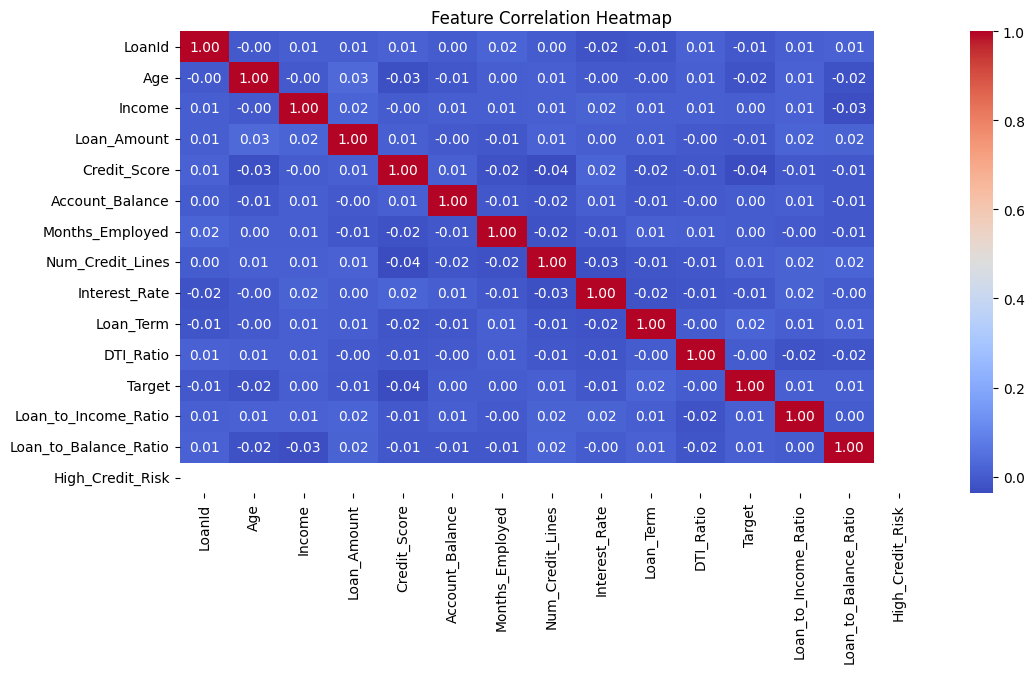

In [27]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



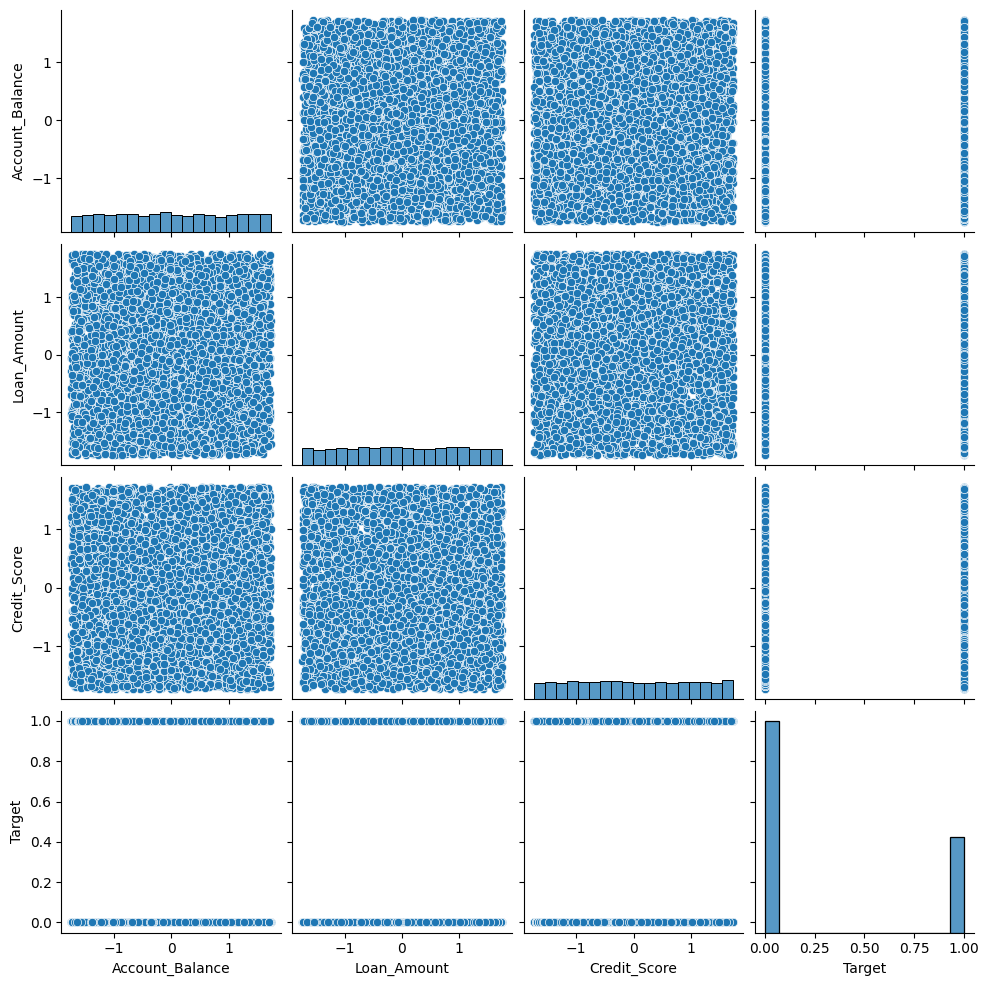

In [28]:
# Pairplot for top correlated features
sns.pairplot(df[['Account_Balance', 'Loan_Amount', 'Credit_Score', 'Target']])
plt.show()



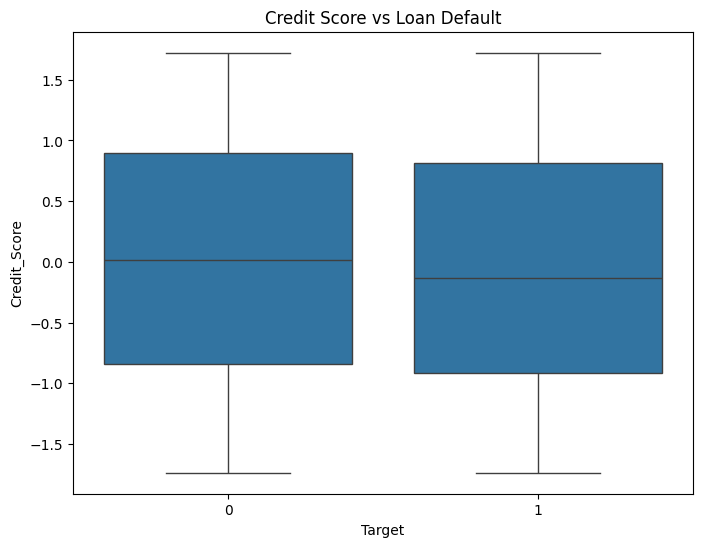

In [29]:
# Boxplot: Credit Score vs Default
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Target'], y=df['Credit_Score'])
plt.title("Credit Score vs Loan Default")
plt.show()



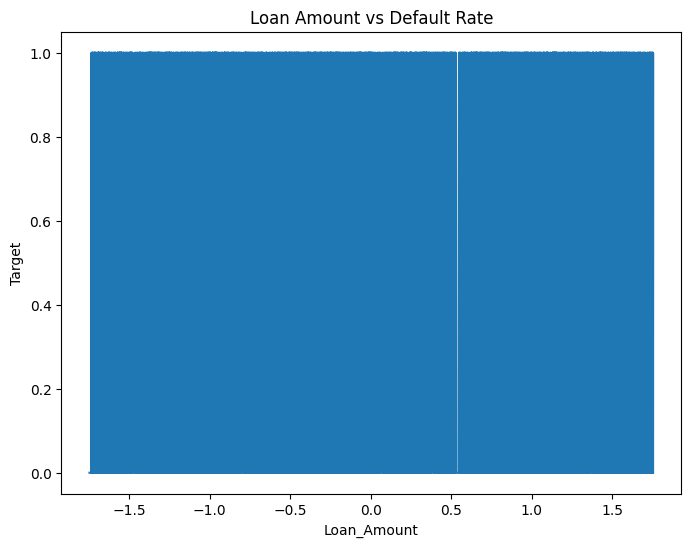

In [30]:
# Loan Amount vs Default Rate
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Loan_Amount'], y=df['Target'])
plt.title("Loan Amount vs Default Rate")
plt.show()



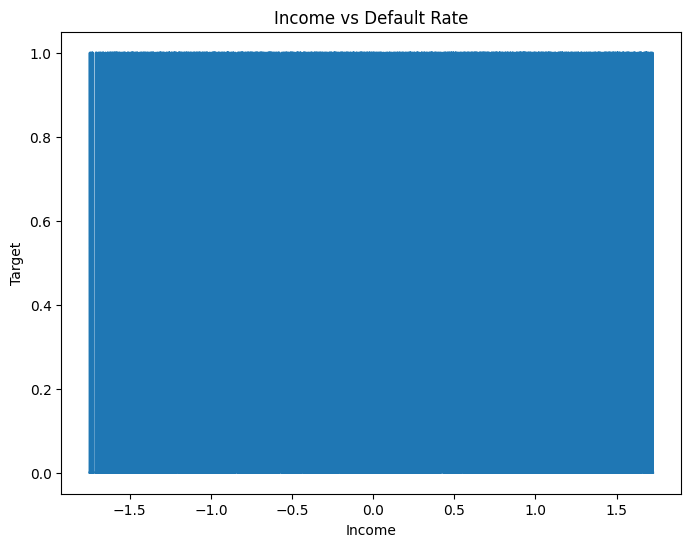

In [31]:
# Income vs Default Rate
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Income'], y=df['Target'])
plt.title("Income vs Default Rate")
plt.show()



In [32]:
# Prepare data for models
X = df.drop(columns=['Target'])
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [33]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}



In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       672
           1       0.00      0.00      0.00       328

    accuracy                           0.67      1000
   macro avg       0.34      0.50      0.40      1000
weighted avg       0.45      0.67      0.54      1000

[[672   0]
 [328   0]]
Decision Tree Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       672
           1       0.37      0.34      0.36       328

    accuracy                           0.60      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.59      0.60      0.59      1000

[[483 189]
 [215 113]]


c:\Users\Deep Naik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deep Naik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deep Naik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Random Forest Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       672
           1       0.50      0.02      0.04       328

    accuracy                           0.67      1000
   macro avg       0.59      0.50      0.42      1000
weighted avg       0.62      0.67      0.55      1000

[[666   6]
 [322   6]]
SVM Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       672
           1       0.00      0.00      0.00       328

    accuracy                           0.67      1000
   macro avg       0.34      0.50      0.40      1000
weighted avg       0.45      0.67      0.54      1000

[[672   0]
 [328   0]]


c:\Users\Deep Naik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deep Naik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deep Naik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf